In [1]:
#https://www.youtube.com/watch?v=oBb9aFmp0Hs
#https://events.yandex.ru/lib/talks/4137/
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from smart_open import smart_open
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from nltk.corpus import stopwords

%matplotlib inline

2018-11-11 13:26:30,298 : INFO : 'pattern' package not found; tag filters are not available for English
/home/max/python/yandex/gensim/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv('/home/max/python/yandex/wepster/tweet.csv')
df = df.dropna()
df['plot'].apply(lambda x: len(x.split(' '))).sum()

2762056

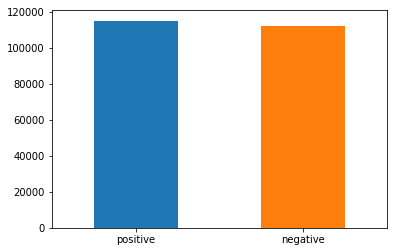

In [4]:
my_tags = ['positive' , 'negative']
df.tag.value_counts().plot(kind="bar", rot=0)

In [5]:
df

,movieId,plot,tag
0,1,"Большое спасибо за помощь, вы самый лучший сот...",positive
1,2,"Да, все-таки он немного похож на него. Но мой ...",positive
2,3,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,positive
3,4,"RT @digger2912: ""Кто то в углу сидит и погибае...",positive
4,5,@irina_dyshkant Вот что значит страшилка :D\nН...,positive
5,6,ну любишь или нет? — Я не знаю кто ты бля:D ht...,positive
6,7,"RT @SpoonLamer: Ох,900 :D ну это конечно же @t...",positive
7,8,RT @veregijytaqo: У тебя есть ухажёр? Нет - мо...,positive
8,9,Поприветствуем моего нового читателя @Alexey17...,positive
9,10,Теперь у меня есть частичка Сиднея :) #Sydney ...,positive


In [6]:
def print_plot(index):
    example = df[df.index == index][['plot', 'tag']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])

In [7]:
print_plot(13)

@Kruglova_Julia_  дааааа))
Ты... Ты... Ты и только ты...)*
Tag: positive


In [8]:
train_data, test_data = train_test_split(df, test_size=0.1, random_state=42)

In [9]:
len(test_data)

22683

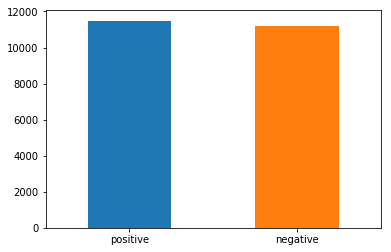

In [10]:
test_data.tag.value_counts().plot(kind="bar", rot=0)

In [11]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(my_tags))
    target_names = my_tags
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy %s' % accuracy_score(target, predictions))
    cm = confusion_matrix(target, predictions)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')

In [13]:
def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data['plot'])
    predictions = classifier.predict(data_features)
    target = data['tag']
    evaluate_prediction(predictions, target)

In [14]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [15]:
%%time
# training
count_vectorizer = CountVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=3000) 
train_data_features = count_vectorizer.fit_transform(train_data['plot'])

CPU times: user 41.7 s, sys: 129 ms, total: 41.8 s
Wall time: 41.8 s


In [16]:
%%time

logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(train_data_features, train_data['tag'])

CPU times: user 4.28 s, sys: 12 ms, total: 4.29 s
Wall time: 4.29 s


In [17]:
count_vectorizer.get_feature_names()[80:90]

[':', ':3', ':33', '=', '?', '@', '[', ']', '^^', '^_^']

accuracy 0.9972666754838425
confusion matrix
 [[11167    28]
 [   34 11454]]
(row=expected, col=predicted)
CPU times: user 4.93 s, sys: 13.9 ms, total: 4.94 s
Wall time: 5.23 s


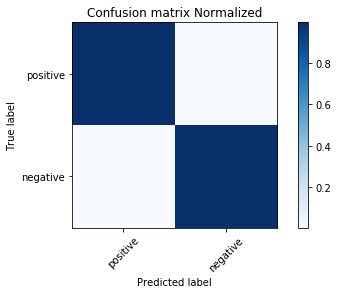

In [18]:
%%time

predict(count_vectorizer, logreg, test_data)

In [19]:
def most_influential_words(vectorizer, genre_index=0, num_words=10):
    features = vectorizer.get_feature_names()
    max_coef = sorted(enumerate(logreg.coef_[genre_index]), key=lambda x:x[1], reverse=True)
    return [features[x[0]] for x in max_coef[:num_words]]    

In [20]:
genre_tag_id = 0
print(my_tags[genre_tag_id])
most_influential_words(count_vectorizer, genre_tag_id)

positive


[')', '^_^', 'ddd', 'd', 'dd', 'dddd', 'ddddd', 'логика', '***', '*']

In [21]:
train_data_features[1]

<1x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [22]:
%%time
n_gram_vectorizer = CountVectorizer(
    analyzer="char",
    ngram_range=([2,5]),
    tokenizer=None,    
    preprocessor=None,                               
    max_features=3000) 

logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)

train_data_features = n_gram_vectorizer.fit_transform(train_data['plot'])

logreg = logreg.fit(train_data_features, train_data['tag'])

CPU times: user 4min 30s, sys: 1.48 s, total: 4min 32s
Wall time: 4min 32s


In [23]:
n_gram_vectorizer.get_feature_names()[50:60]

[' б', ' ба', ' бе', ' без', ' без ', ' бл', ' бли', ' бо', ' бол', ' боль']

accuracy 0.9737689018207468
confusion matrix
 [[10935   260]
 [  335 11153]]
(row=expected, col=predicted)


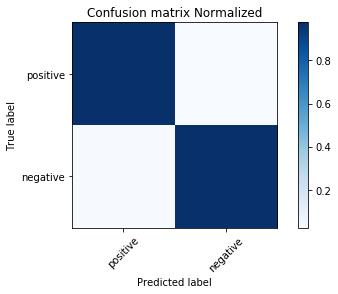

In [24]:
predict(n_gram_vectorizer, logreg, test_data)

In [33]:
# Doc2Vec

In [25]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [26]:
train_tagged = train_data.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['plot']), tags=[r.tag]), axis=1)

In [27]:
test_tagged = test_data.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['plot']), tags=[r.tag]), axis=1)

In [28]:
test_tagged.values[52]

TaggedDocument(words=['котейка', 'прищел', 'хорошо', 'что', 'ты', 'рядом', 'мне', 'тут', 'ужасно', 'http', '//t.co/1oa3gug2f4'], tags=['negative'])

In [29]:
%%time
trainsent = train_tagged.values
testsent = test_tagged.values

# simple gensim doc2vec api
doc2vec_model = Doc2Vec(trainsent, workers=1, size=5, iter=20, dm=1)

train_targets, train_regressors = zip(
    *[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in trainsent])

/home/max/python/yandex/gensim/lib/python3.6/site-packages/gensim/models/doc2vec.py:362: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/home/max/python/yandex/gensim/lib/python3.6/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
2018-11-11 13:35:08,790 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2018-11-11 13:35:08,791 : INFO : collecting all words and their counts
2018-11-11 13:35:08,792 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-11-11 13:35:08,856 : INFO : PROGRESS: at example #10000, processed 111293 words (1755802/s), 33786 word types, 2 tags
2018-11

2018-11-11 13:35:38,497 : INFO : EPOCH - 5 : training on 2274347 raw words (1826655 effective words) took 5.5s, 332883 effective words/s
2018-11-11 13:35:39,508 : INFO : EPOCH 6 - PROGRESS: at 18.96% examples, 343460 words/s, in_qsize 1, out_qsize 0
2018-11-11 13:35:40,522 : INFO : EPOCH 6 - PROGRESS: at 37.46% examples, 337842 words/s, in_qsize 1, out_qsize 0
2018-11-11 13:35:41,539 : INFO : EPOCH 6 - PROGRESS: at 55.89% examples, 335646 words/s, in_qsize 1, out_qsize 0
2018-11-11 13:35:42,560 : INFO : EPOCH 6 - PROGRESS: at 74.31% examples, 334311 words/s, in_qsize 1, out_qsize 0
2018-11-11 13:35:43,582 : INFO : EPOCH 6 - PROGRESS: at 92.73% examples, 333354 words/s, in_qsize 1, out_qsize 0
2018-11-11 13:35:43,995 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-11 13:35:43,996 : INFO : EPOCH - 6 : training on 2274347 raw words (1826029 effective words) took 5.5s, 332393 effective words/s
2018-11-11 13:35:45,009 : INFO : EPOCH 7 - PROGRESS: at 18.08% example

2018-11-11 13:36:36,074 : INFO : EPOCH 16 - PROGRESS: at 35.26% examples, 317072 words/s, in_qsize 1, out_qsize 0
2018-11-11 13:36:37,086 : INFO : EPOCH 16 - PROGRESS: at 52.83% examples, 317213 words/s, in_qsize 2, out_qsize 0
2018-11-11 13:36:38,096 : INFO : EPOCH 16 - PROGRESS: at 69.91% examples, 315408 words/s, in_qsize 2, out_qsize 0
2018-11-11 13:36:39,098 : INFO : EPOCH 16 - PROGRESS: at 87.01% examples, 314817 words/s, in_qsize 2, out_qsize 0
2018-11-11 13:36:39,842 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-11 13:36:39,843 : INFO : EPOCH - 16 : training on 2274347 raw words (1826539 effective words) took 5.8s, 315261 effective words/s
2018-11-11 13:36:40,860 : INFO : EPOCH 17 - PROGRESS: at 17.63% examples, 317227 words/s, in_qsize 1, out_qsize 0
2018-11-11 13:36:41,884 : INFO : EPOCH 17 - PROGRESS: at 35.26% examples, 315401 words/s, in_qsize 1, out_qsize 0
2018-11-11 13:36:42,899 : INFO : EPOCH 17 - PROGRESS: at 53.26% examples, 318420 words/

CPU times: user 3min 14s, sys: 415 ms, total: 3min 14s
Wall time: 3min 14s


In [30]:
%%time
test_targets, test_regressors = zip(
    *[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in testsent])

CPU times: user 8.43 s, sys: 1e+03 ns, total: 8.43 s
Wall time: 8.43 s


accuracy 0.6095313671031168
confusion matrix
 [[6728 4467]
 [4390 7098]]
(row=expected, col=predicted)


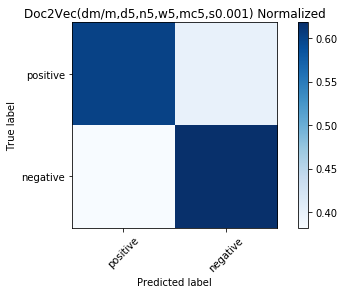

In [31]:
logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(train_regressors, train_targets)
evaluate_prediction(logreg.predict(test_regressors), test_targets, title=str(doc2vec_model))

2018-11-11 13:41:27,892 : INFO : precomputing L2-norms of doc weight vectors


accuracy 0.6085614777586739
confusion matrix
 [[6335 4860]
 [4019 7469]]
(row=expected, col=predicted)
CPU times: user 1.17 s, sys: 16 ms, total: 1.18 s
Wall time: 1.16 s


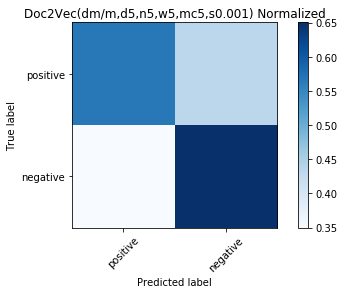

In [32]:
%%time 
knn_test_predictions = [
    doc2vec_model.docvecs.most_similar([pred_vec], topn=1)[0][0]
    for pred_vec in test_regressors
]
evaluate_prediction(knn_test_predictions, test_targets, str(doc2vec_model))

In [33]:
doc2vec_model.docvecs.most_similar('positive')

[('negative', 0.44412583112716675)]

In [34]:
doc2vec_model.wv.most_similar([doc2vec_model.docvecs['positive']])

2018-11-11 13:41:33,848 : INFO : precomputing L2-norms of word weight vectors


[('сочетание', 0.9975453019142151),
 ('посему', 0.9973621368408203),
 ('новое', 0.9964147210121155),
 ('killjoy_anna', 0.9948328733444214),
 ('apollo_loki', 0.9941250681877136),
 ('svaluev', 0.9937664270401001),
 ('-d', 0.9936102032661438),
 ('звери', 0.9929489493370056),
 ('snapy_ekb', 0.9924319386482239),
 ('supeeerrrr', 0.9924147725105286)]

accuracy 0.6137195256359388
confusion matrix
 [[6820 4375]
 [4387 7101]]
(row=expected, col=predicted)
34


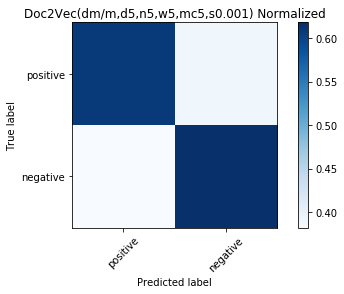

In [35]:
seed = 34
#24, 31, 34, 36, 38

doc2vec_model.seed = seed
doc2vec_model.random = random.RandomState(seed)


test_targets, test_regressors = zip(
    *[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in testsent])


logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5, random_state=42)
logreg = logreg.fit(train_regressors, train_targets)
evaluate_prediction(logreg.predict(test_regressors), test_targets, title=str(doc2vec_model))
print (doc2vec_model.seed)

In [37]:
print('*****---*****')

word_list = 'обожаю ходить и танцевать'.split(' ')

infer_vector = doc2vec_model.infer_vector(word_list)
similar_documents = doc2vec_model.docvecs.most_similar([infer_vector], topn = 2)
print(word_list)
print(similar_documents)


*****---*****
['обожаю', 'ходить', 'и', 'танцевать']
[('positive', 0.8357163667678833), ('negative', 0.29398486018180847)]
